In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from kadi import events
import Ska.engarchive.fetch as fetch
from Ska.tdb import msids
from datetime import datetime, timedelta
from Ska.Matplotlib import plot_cxctime
from Chandra.Time import DateTime

In [2]:
fetch.data_source.set('maude') # default data source is 'cxc'

## Retrieve info on MSIDs ##

* _AOPCADMD_

In [3]:
ids = msids.find('aopcadmd')
m0 = ids[0]

In [4]:
m0.Tsc

array([('AOPCADMD', 1, 1, 0, 0, 'STBY'), ('AOPCADMD', 1, 7, 6, 6, 'NULL'),
       ('AOPCADMD', 1, 6, 5, 5, 'RMAN'), ('AOPCADMD', 1, 5, 4, 4, 'PWRF'),
       ('AOPCADMD', 1, 4, 3, 3, 'NSUN'), ('AOPCADMD', 1, 2, 1, 1, 'NPNT'),
       ('AOPCADMD', 1, 3, 2, 2, 'NMAN')],
      dtype=[('MSID', '<U15'), ('CALIBRATION_SET_NUM', '<i8'), ('SEQUENCE_NUM', '<i8'), ('LOW_RAW_COUNT', '<i8'), ('HIGH_RAW_COUNT', '<i8'), ('STATE_CODE', '<U4')])

* _AOFSTAR_

In [5]:
ids = msids.find('aofstar')
m0 = ids[0]
m0.Tsc

array([('AOFSTAR', 1, 1, 0, 0, 'BRIT'), ('AOFSTAR', 1, 2, 1, 1, 'AQXN'),
       ('AOFSTAR', 1, 3, 2, 2, 'GUID')],
      dtype=[('MSID', '<U15'), ('CALIBRATION_SET_NUM', '<i8'), ('SEQUENCE_NUM', '<i8'), ('LOW_RAW_COUNT', '<i8'), ('HIGH_RAW_COUNT', '<i8'), ('STATE_CODE', '<U4')])

* Format? Search for any string that can help identify the MSID. In this case I searched for 'format', and the MSID that we want is _CCSDSTMF_

In [6]:
ids = msids.find('format')

In [7]:
ids

[<MsidView msid="CCSDSTMF" technical_name="TELEMETRY FORMAT ID">,
 <MsidView msid="CF6SNCH1" technical_name="FORMAT 6 SYNCH WORD 1">,
 <MsidView msid="CF6SNCH2" technical_name="FORMAT 6 SYNCH WORD 2">,
 <MsidView msid="CF6SNCH3" technical_name="FORMAT 6 SYNCH WORD 3">,
 <MsidView msid="CIUTIMFM" technical_name="IU TIME OUTPUT FOR FORMAT">,
 <MsidView msid="COACTLMF" technical_name="NORMAL/SAFE MODE TELEMETRY TABLE ACTIVE">,
 <MsidView msid="COTLRDSF" technical_name="LOW RATE DUMP/SUB FORMAT INDICATOR">,
 <MsidView msid="COTMDNLK" technical_name="DOWN-LINK TELEMETRY INDICATOR">,
 <MsidView msid="COTMSFS2" technical_name="LOW RATE DUMP/SUB FORMAT INDICATOR - COTMSFS2">,
 <MsidView msid="CTUFMTSL" technical_name="FORMAT SELECTED">,
 <MsidView msid="CVCSYNC" technical_name="STS FORMAT SYNC PATTERN">,
 <MsidView msid="OSSRAREF" technical_name="REFORMAT_ERROR -- OSSRAREF">,
 <MsidView msid="OSSRBREF" technical_name="REFORMAT_ERROR -- OSSRBREF">,
 <MsidView msid="OSSRC22" technical_name="KC.S

In [8]:
m0 = ids[0]
m0.Tsc

array([('CCSDSTMF', 1, 1, 0, 0, 'FMT1'), ('CCSDSTMF', 1, 2, 1, 1, 'FMT2'),
       ('CCSDSTMF', 1, 3, 2, 2, 'FMT3'), ('CCSDSTMF', 1, 4, 3, 3, 'FMT4'),
       ('CCSDSTMF', 1, 5, 4, 4, 'FMT5'), ('CCSDSTMF', 1, 6, 5, 5, 'FMT6')],
      dtype=[('MSID', '<U15'), ('CALIBRATION_SET_NUM', '<i8'), ('SEQUENCE_NUM', '<i8'), ('LOW_RAW_COUNT', '<i8'), ('HIGH_RAW_COUNT', '<i8'), ('STATE_CODE', '<U4')])

* _SCS 107_

In [9]:
ids = msids.find('scs 107')
ids

[<MsidView msid="COSCS107S" technical_name="SCS 107 STATE">]

In [10]:
m0 = ids[0]
m0.Tsc

array([('COSCS107S', 1, 2, 1, 1, 'INAC'),
       ('COSCS107S', 1, 3, 2, 2, 'SUSP'), ('COSCS107S', 1, 1, 0, 0, 'ACT'),
       ('COSCS107S', 1, 4, 3, 3, 'DISA')],
      dtype=[('MSID', '<U15'), ('CALIBRATION_SET_NUM', '<i8'), ('SEQUENCE_NUM', '<i8'), ('LOW_RAW_COUNT', '<i8'), ('HIGH_RAW_COUNT', '<i8'), ('STATE_CODE', '<U4')])

## Examples ##

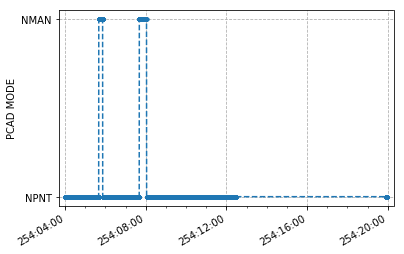

In [22]:
dat = fetch.Msid('aopcadmd', '2017:254:04:00:00')
dat.plot('.--')
plt.ylabel('PCAD MODE')
plt.grid(ls='dashed')

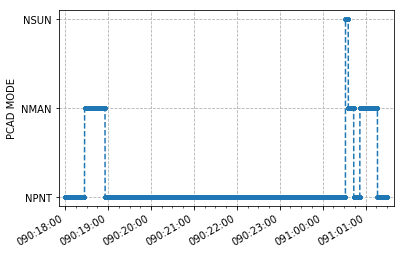

In [12]:
dat = fetch.Msid('aopcadmd', '2017:090:18:00:00', '2017:091:01:30:00')
dat.plot('.--')
plt.ylabel('PCAD MODE')
plt.grid(ls='dashed');

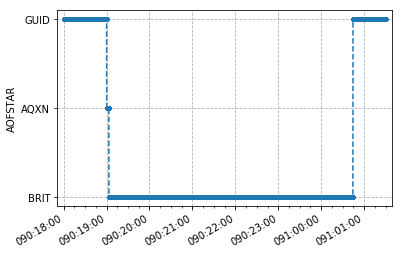

In [13]:
dat = fetch.Msid('aofstar', '2017:090:18:00:00', '2017:091:01:30:00')
dat.plot('.--')
plt.ylabel('AOFSTAR')
plt.grid(ls='dashed');

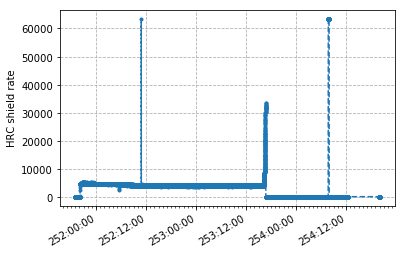

In [23]:
dat = fetch.Msid('2SHLDART', '2017:251:19:00:00')
plot_cxctime(dat.times, dat.vals, '.--')
plt.ylabel('HRC shield rate')
plt.grid(ls='dashed');

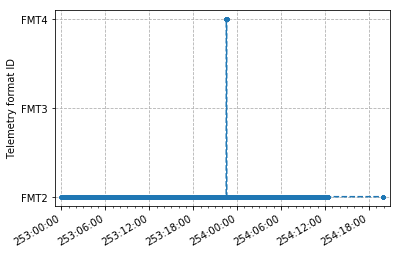

In [15]:
dat = fetch.Msid('CCSDSTMF', '2017:253:00:00:00')
dat.plot('.--')
plt.ylabel('Telemetry format ID')
plt.grid(ls='dashed');

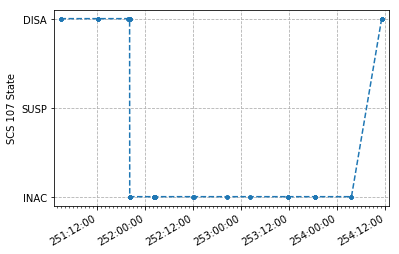

In [16]:
dat = fetch.Msid('COSCS107S', '2017:250:19:00:00')
dat.plot('.--')
plt.ylabel('SCS 107 State')
plt.grid(ls='dashed');

## Fetch the most recent data from _maude_ ##

In [17]:
tnow = datetime.now()
dt = timedelta(hours=10) # Fetch the most recent 10 hours of data
# dt = timedelta(days=1) # Fetch the most recent 1 day of data
# dt = timedelta(minutes=10) # Fetch the most recent 10 minutes of data
tstart = tnow - dt
dat = fetch.Msid('aofstar', tstart)

In [18]:
DateTime(tnow).date

'2017:254:15:57:46.670'

In [19]:
# Time of the last telemetry data point
DateTime(dat.times[-1]).date

'2017:254:19:57:39.321'

In [20]:
comms = dat.select_intervals(events.dsn_comms, copy=True)

In [21]:
# End of the last comm
DateTime(comms.times[-1]).date

'2017:254:19:57:39.321'